## Exploratory Data Analysis on Bitcoin Historical Data 

### Table of Content 
1. Check Data Structure 
2. Check and handle missing data (if any)
3. Summary Statistics
4. Visualise data 
5. Time series analysis
6. Outlier detection if needed
7. Featuring engineering if necessary
8. Any Hypothesis 
9. Findings and conclusions 

In [1]:
import pandas as pd 

In [8]:
url = 'https://drive.google.com/file/d/1oJflZDQVzjwfcuXq-4ah7q-See9dJfjP'
path = 'https://drive.google.com/uc?id='+url.split('/')[-1]
data = pd.read_csv(path, header=1) 

data.head()

unix                 date   symbol     open     high      low  \
0  1686528000  2023-06-12 00:00:00  BTC/USD  25940.0  25946.0  25920.0   
1  1686524400  2023-06-11 23:00:00  BTC/USD  25904.0  25948.0  25833.0   
2  1686520800  2023-06-11 22:00:00  BTC/USD  26060.0  26083.0  25769.0   
3  1686517200  2023-06-11 21:00:00  BTC/USD  26139.0  26152.0  25993.0   
4  1686513600  2023-06-11 20:00:00  BTC/USD  26048.0  26209.0  26048.0   

     close  Volume BTC    Volume USD  
0  25930.0    3.151708  8.172379e+04  
1  25941.0   32.781225  8.503778e+05  
2  25899.0  154.997012  4.014268e+06  
3  26060.0   32.359775  8.432957e+05  
4  26139.0   81.928913  2.141540e+06

In [10]:
data.dtypes

unix            int64
date           object
symbol         object
open          float64
high          float64
low           float64
close         float64
Volume BTC    float64
Volume USD    float64
dtype: object

## Data Structure 

1. Check Data Info 
2. Check data description

In [11]:
#data info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44491 entries, 0 to 44490
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unix        44491 non-null  int64  
 1   date        44491 non-null  object 
 2   symbol      44491 non-null  object 
 3   open        44491 non-null  float64
 4   high        44491 non-null  float64
 5   low         44491 non-null  float64
 6   close       44491 non-null  float64
 7   Volume BTC  44491 non-null  float64
 8   Volume USD  44491 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 3.1+ MB


In [12]:
data.describe()

unix          open          high           low         close  \
count  4.449100e+04  44491.000000  44491.000000  44491.000000  44491.000000   
mean   1.606446e+09  21487.975298  21597.693251  21370.263662  21488.430509   
std    4.623692e+07  16661.672344  16756.000550  16559.585721  16661.720170   
min    1.526364e+09   3139.760000   3158.340000   3122.280000   3139.760000   
25%    1.566405e+09   7930.940000   7966.790000   7887.555000   7930.940000   
50%    1.606446e+09  16540.000000  16568.000000  16505.000000  16539.000000   
75%    1.646487e+09  33172.945000  33467.450000  32872.755000  33162.110000   
max    1.686528e+09  68635.050000  69000.000000  68447.000000  68627.010000   

         Volume BTC    Volume USD  
count  4.449100e+04  4.449100e+04  
mean   1.205349e+06  2.803040e+06  
std    2.772224e+06  6.555821e+06  
min    0.000000e+00  0.000000e+00  
25%    7.605811e+01  2.372600e+02  
50%    4.093548e+02  4.745202e+05  
75%    1.352624e+06  2.933060e+06  
max    6.857061e+07  2.582324e+08

### Findings 

1. There are 44,491 entries in the dataset 
2. The mean bitcoin price at open is $21,488
3. For the alloted timeframe, the minimum bitcoin price is $3139 (wish i bought at that price :( 
4. Bitcoin peak price was $68635 for the timeframe 


### ToDos 
1. Format date column to datetime 
2. Check for missing values

In [13]:
# Format date 

data['Datetime'] = pd.to_datetime(data['unix'], unit='s')

data.head()


unix                 date   symbol     open     high      low  \
0  1686528000  2023-06-12 00:00:00  BTC/USD  25940.0  25946.0  25920.0   
1  1686524400  2023-06-11 23:00:00  BTC/USD  25904.0  25948.0  25833.0   
2  1686520800  2023-06-11 22:00:00  BTC/USD  26060.0  26083.0  25769.0   
3  1686517200  2023-06-11 21:00:00  BTC/USD  26139.0  26152.0  25993.0   
4  1686513600  2023-06-11 20:00:00  BTC/USD  26048.0  26209.0  26048.0   

     close  Volume BTC    Volume USD            Datetime  
0  25930.0    3.151708  8.172379e+04 2023-06-12 00:00:00  
1  25941.0   32.781225  8.503778e+05 2023-06-11 23:00:00  
2  25899.0  154.997012  4.014268e+06 2023-06-11 22:00:00  
3  26060.0   32.359775  8.432957e+05 2023-06-11 21:00:00  
4  26139.0   81.928913  2.141540e+06 2023-06-11 20:00:00

In [14]:
#missing values?

data.isnull().sum()

unix          0
date          0
symbol        0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
Datetime      0
dtype: int64

## Data Visualisation

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


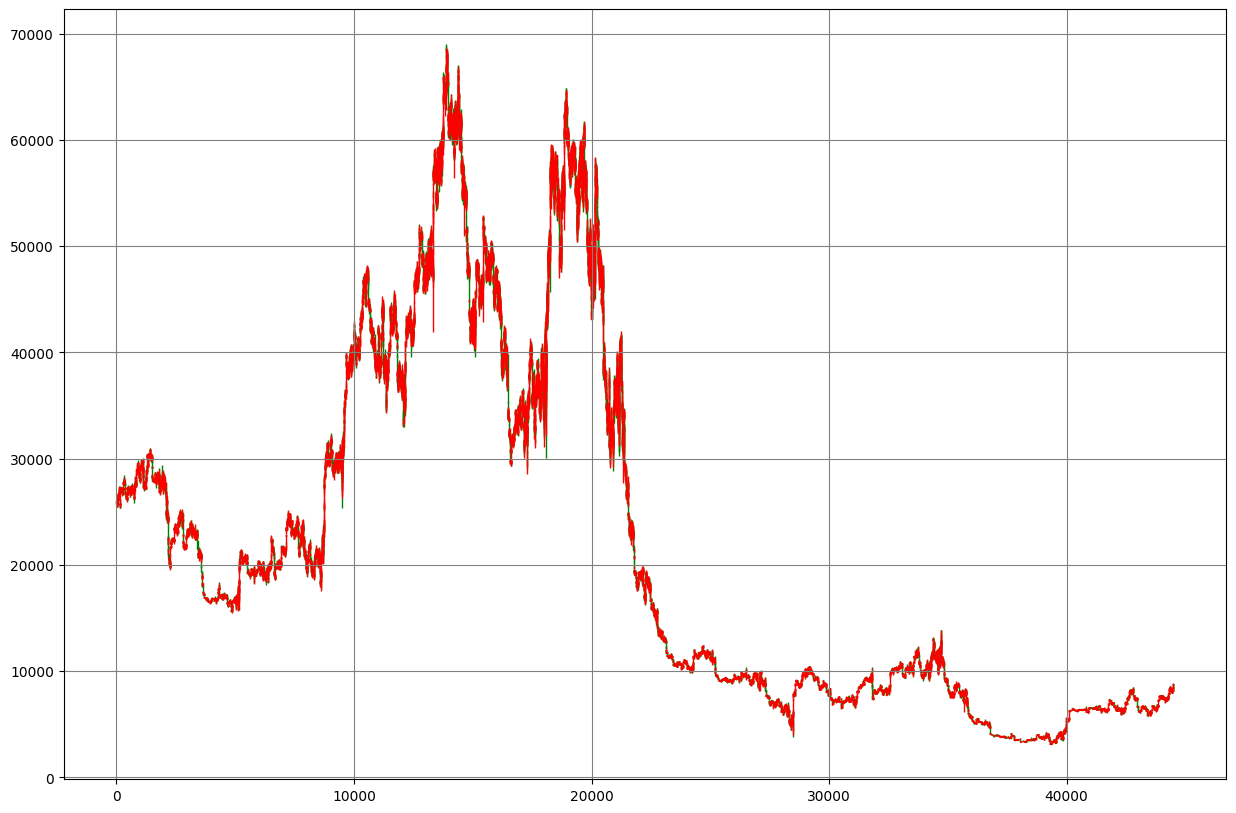

In [19]:
width  = 0.9   # width of real body
width2 = 0.05  # width of shadow
fig, ax = plt.subplots(figsize=(15,10))
# find the rows that are bullish
dataup = data[data.close >= data.open]
# find the rows that are bearish
datadown = data[data.close < data.open]
# plot the bullish candle stick
ax.bar(dataup.index, dataup.close - dataup.open, width, 
       bottom = dataup.open, edgecolor='g', color='green')
ax.bar(dataup.index, dataup.high - dataup.close, width2, 
       bottom = dataup.close, edgecolor='g', color='green')
ax.bar(dataup.index, dataup.low - dataup.open, width2, 
       bottom = dataup.open, edgecolor='g', color='green')
# plot the bearish candle stick
ax.bar(datadown.index, datadown.close - datadown.open, width, 
       bottom = datadown.open, edgecolor='r', color='red')
ax.bar(datadown.index, datadown.high - datadown.open, width2, 
       bottom = datadown.open, edgecolor='r', color='red')
ax.bar(datadown.index, datadown.low - datadown.close, width2, 
       bottom = datadown.close, edgecolor='r', color='red')
ax.grid(color='gray')

## Using plotly

In [25]:
import plotly.graph_objects as go
fig = go.Figure(data=
    [go.Candlestick(x = data.index,
                    open  = data["open"],
                    high  = data["high"],
                    low   = data["low"],
                    close = data["close"])]
)
fig.update_layout(
    title='BTC Price',
    yaxis_title="Price ($)"
)
fig.show()

## Time series analysis 

In [20]:
data.set_index('Datetime', inplace=True)

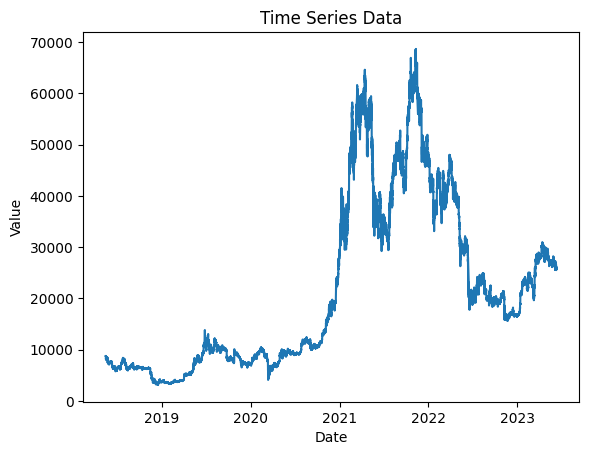

In [21]:
plt.plot(data.index, data['open'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Data')
plt.show()


In [22]:
rolling_mean = data['close'].rolling(window=7).mean()
rolling_std = data['close'].rolling(window=7).std()

rolling_mean

Datetime
2023-06-12 00:00:00            NaN
2023-06-11 23:00:00            NaN
2023-06-11 22:00:00            NaN
2023-06-11 21:00:00            NaN
2023-06-11 20:00:00            NaN
                          ...     
2018-05-15 10:00:00    8664.061429
2018-05-15 09:00:00    8688.788571
2018-05-15 08:00:00    8718.530000
2018-05-15 07:00:00    8750.134286
2018-05-15 06:00:00    8747.528571
Name: close, Length: 44491, dtype: float64

In [23]:
rolling_std

Datetime
2023-06-12 00:00:00           NaN
2023-06-11 23:00:00           NaN
2023-06-11 22:00:00           NaN
2023-06-11 21:00:00           NaN
2023-06-11 20:00:00           NaN
                          ...    
2018-05-15 10:00:00    131.347473
2018-05-15 09:00:00    118.739361
2018-05-15 08:00:00     92.727335
2018-05-15 07:00:00     28.026116
2018-05-15 06:00:00     27.887084
Name: close, Length: 44491, dtype: float64

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['close'], model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

seasonal

Datetime
2023-06-12 00:00:00    13.423482
2023-06-11 23:00:00     8.676802
2023-06-11 22:00:00    12.273034
2023-06-11 21:00:00    10.239913
2023-06-11 20:00:00    -2.013850
                         ...    
2018-05-15 10:00:00    -3.792504
2018-05-15 09:00:00    -7.811599
2018-05-15 08:00:00    -4.453023
2018-05-15 07:00:00    -3.848743
2018-05-15 06:00:00    -6.624080
Name: seasonal, Length: 44491, dtype: float64

## Autocorrelation Analysis

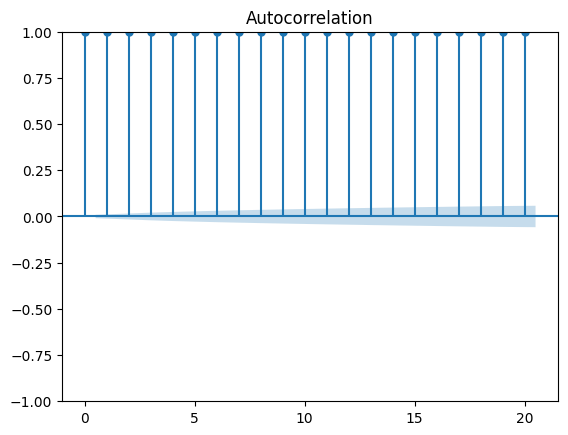

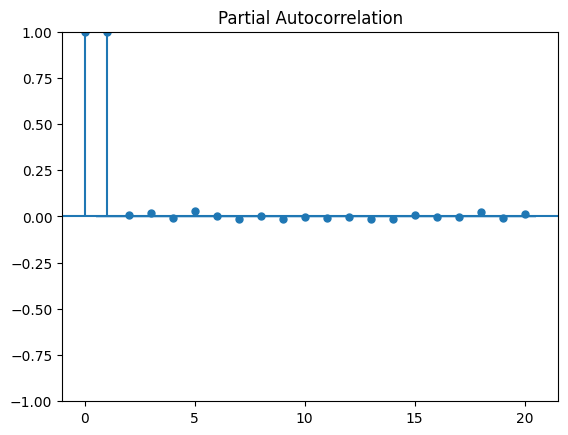

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data['close'], lags=20)
plot_pacf(data['close'], lags=20)
plt.show()
